In [3]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES
scale = 70
seed = 7
from imutils import paths
import matplotlib.pyplot as plt
import cv2
import os 


In [4]:
! pip install -q kaggle

In [5]:
from google.colab import files

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shefalievincent","key":"4f56f1e8aa37df1017d1927e92e12706"}'}

In [7]:
! mkdir ~/.kaggle

In [8]:

! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c plant-seedlings-classification

100% 1.68G/1.69G [00:50<00:00, 52.3MB/s]
100% 1.69G/1.69G [00:50<00:00, 36.1MB/s]


In [11]:
! unzip plant-seedlings-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/ad12382d4.png      
  inflating: test/adb7a032c.png      
  inflating: test/ae90f2827.png      
  inflating: test/aecfaed64.png      
  inflating: test/aee6fa3df.png      
  inflating: test/af45e222a.png      
  inflating: test/afa446484.png      
  inflating: test/afcf6abd5.png      
  inflating: test/b026bf8ca.png      
  inflating: test/b03397525.png      
  inflating: test/b0acaff4a.png      
  inflating: test/b130a0632.png      
  inflating: test/b145ba9d4.png      
  inflating: test/b1cd2a91e.png      
  inflating: test/b215531dd.png      
  inflating: test/b2706e2b3.png      
  inflating: test/b29339405.png      
  inflating: test/b30ab4659.png      
  inflating: test/b31292706.png      
  inflating: test/b341d0aab.png      
  inflating: test/b39c71707.png      
  inflating: test/b3d6fdb80.png      
  inflating: test/b3e08b037.png      
  inflating: test/b47691c08.png      
  inflating: test/b4c3df835.png      

In [12]:
directory=os.listdir('/content/train')
print(directory)

['Cleavers', 'Common Chickweed', 'Maize', 'Charlock', 'Scentless Mayweed', 'Black-grass', 'Sugar beet', 'Loose Silky-bent', 'Fat Hen', 'Common wheat', 'Small-flowered Cranesbill', 'Shepherds Purse']


In [13]:
train_data_folder = '/content/train'

In [14]:
images = []
classes=[]
missing=0
for class_folder_name in directory:
    class_folder_path = os.path.join(train_data_folder, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        

In [15]:
len(images)

4750

In [16]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [17]:
images = [resize_images(img) for img in images]
images[0].shape

(256, 256, 3)

In [18]:
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Loose Silky-bent images is  -> 654
number of Shepherds Purse images is  -> 231
number of Cleavers images is  -> 287
number of Sugar beet images is  -> 385
number of Fat Hen images is  -> 475
number of Charlock images is  -> 390
number of Black-grass images is  -> 263
number of Maize images is  -> 221
number of Scentless Mayweed images is  -> 516
number of Common Chickweed images is  -> 611
number of Common wheat images is  -> 221
number of Small-flowered Cranesbill images is  -> 496


In [61]:
labels = pd.DataFrame(classes,columns = ['PLANT_CLASS'])
labels = labels.reset_index().rename(columns={labels.index.name:'integers'})
labels

,index,PLANT_CLASS
0,0,Cleavers
1,1,Cleavers
2,2,Cleavers
3,3,Cleavers
4,4,Cleavers
...,...,...
4745,4745,Shepherds Purse
4746,4746,Shepherds Purse
4747,4747,Shepherds Purse
4748,4748,Shepherds Purse


Text(0.5, 0.98, 'Categorical Plotting')

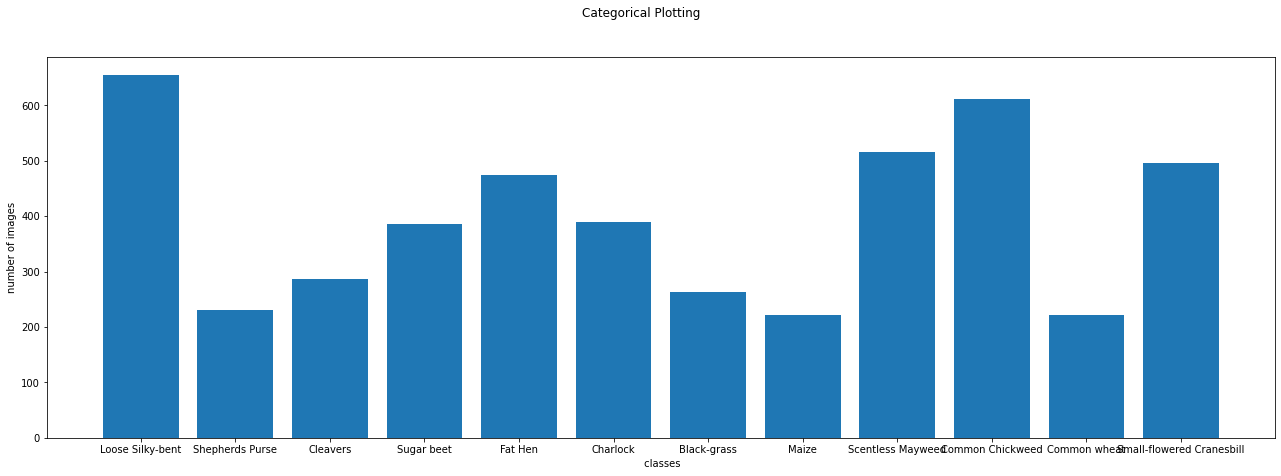

In [24]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

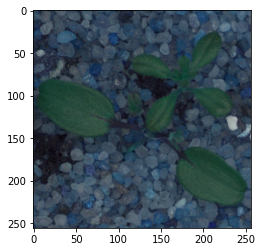

In [25]:
plt.imshow(images[30])

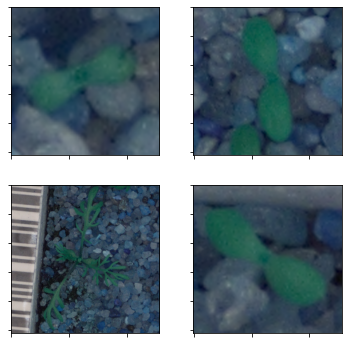

In [26]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

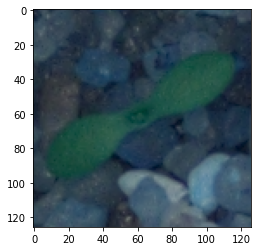

In [27]:
img = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")
plt.imshow(img)

In [28]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [29]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [30]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

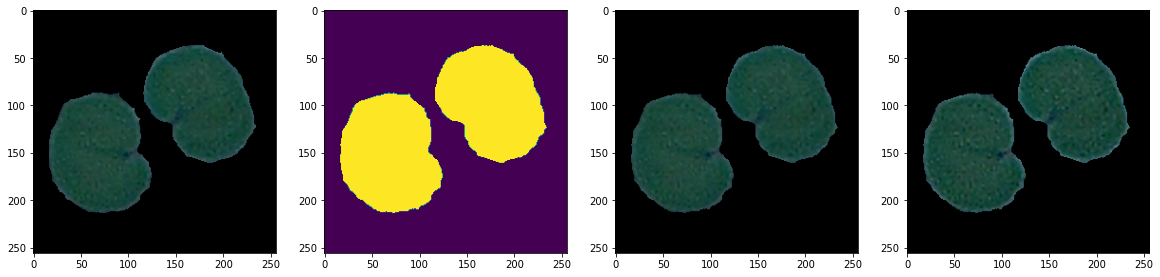

In [73]:
image = images[classes == "Small-flowered Cranesbill"][30]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

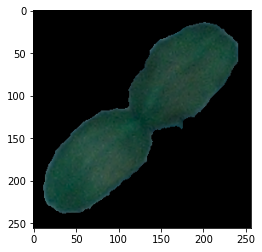

In [32]:
plt.imshow(images[40])

In [33]:
images.shape

(4750, 256, 256, 3)

In [34]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [35]:
y[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
import cv2
## create a zeros np array to hold the final pre-processed Images
X=np.zeros((len(images),64,64,3),dtype='float64')
## Loop thru the Images array
for i,img in enumerate(images):
  ## Backgroung noise removal and Masking
  ## convert the colorspace to HSV (better color detection than RGB space)
  img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  sensitivity=35

  lower_hsv=np.array([60-sensitivity,100,50])

  upper_hsv=np.array([60+sensitivity,255,255])
  ## The inRange Function returns a binary mask , where the white pixels represent the pixels that fall into the range and black pixels do not!
  mask=cv2.inRange(img_hsv,lower_hsv,upper_hsv)
  ## Ellipse shape Kernel to perform morphological trnsformation
  kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
  ## MORPH_CLOSE is useful in closing small holes/black points in foreground objects
  mask=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
  ## Only the intersecting parts of the image with the mask created is captured
  output=cv2.bitwise_and(img,img,mask=mask)
  ## the masked image is blurred to remove further digital noise
  img_blur=cv2.GaussianBlur(output,(0,0),3)
  ## Resizing the image
  img_resize=cv2.resize(img_blur,(64,64))
  ## Adding the Pre-Processed Image to the Numpy Array
  X[i]=img_resize
  ## X contains all the Pre Processed Images

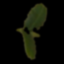

In [37]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[0])

In [38]:
X.shape

(4750, 64, 64, 3)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [40]:
X_train.shape

(3325, 64, 64, 3)

In [41]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [42]:
print(X_test.shape)
print(X_val.shape)

(712, 64, 64, 3)
(713, 64, 64, 3)


In [43]:
#Build CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout

In [74]:
## Bulid a CNN Sequential Classifier
from tensorflow.keras.layers import BatchNormalization
Classifier=Sequential()

## Add a Convolution Layer
Classifier.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3),padding='same'))
Classifier.add(BatchNormalization())
## Add a Pooling Layer
Classifier.add(MaxPooling2D(pool_size=(2,2)))


## Add a Convolution Layer
Classifier.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid'))
Classifier.add(BatchNormalization())

## Add a Pooling Layer
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Dropout(rate=0.5))


## Flatten the input to Fully connected Layer
Classifier.add(Flatten())

## Add a dense layer
Classifier.add(Dense(units=32,activation='relu'))

Classifier.add(Dropout(rate=0.5))

Classifier.add(Dense(units=128,activation='relu'))


Classifier.add(Dense(units=12,activation='softmax'))

Classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                      

In [75]:
Classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
#Fit the Model
Classifier.fit(X_train,y_train,validation_data=(X_val,Y_val),epochs=50,batch_size=20)

Epoch 1/50
167/167 [==============================] - 2s 7ms/step - loss: 2.2428 - accuracy: 0.2358 - val_loss: 1.7975 - val_accuracy: 0.3913
Epoch 2/50
167/167 [==============================] - 1s 6ms/step - loss: 1.8132 - accuracy: 0.3684 - val_loss: 1.6897 - val_accuracy: 0.4123
Epoch 3/50
167/167 [==============================] - 1s 5ms/step - loss: 1.6737 - accuracy: 0.4331 - val_loss: 1.7384 - val_accuracy: 0.3562
Epoch 4/50
167/167 [==============================] - 1s 6ms/step - loss: 1.5044 - accuracy: 0.4815 - val_loss: 1.2441 - val_accuracy: 0.5540
Epoch 5/50
167/167 [==============================] - 1s 6ms/step - loss: 1.4182 - accuracy: 0.5173 - val_loss: 1.2828 - val_accuracy: 0.5358
Epoch 6/50
167/167 [==============================] - 1s 5ms/step - loss: 1.3168 - accuracy: 0.5447 - val_loss: 1.0551 - val_accuracy: 0.6367
Epoch 7/50
167/167 [==============================] - 1s 7ms/step - loss: 1.2622 - accuracy: 0.5621 - val_loss: 1.1475 - val_accuracy: 0.6396
Epoch 

In [77]:
Classifier.evaluate(X_test,y_test)

23/23 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.7626


[0.812202513217926, 0.7626404762268066]

In [78]:
#Make Predictions on X_test
y_pred=Classifier.predict(X_test)

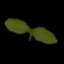

Predicted Label for X[2] is 3
Actual label for X[2] is 3
The Plant Species is 3    Cleavers
Name: PLANT_CLASS, dtype: object
*******************************************************************************************


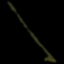

Predicted Label for X[3] is 0
Actual label for X[3] is 0
The Plant Species is 0    Cleavers
Name: PLANT_CLASS, dtype: object
*******************************************************************************************


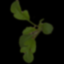

Predicted Label for X[33] is 3
Actual label for X[33] is 9
The Plant Species is 9    Cleavers
Name: PLANT_CLASS, dtype: object
*******************************************************************************************


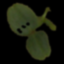

Predicted Label for X[36] is 2
Actual label for X[36] is 2
The Plant Species is 2    Cleavers
Name: PLANT_CLASS, dtype: object
*******************************************************************************************


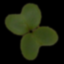

Predicted Label for X[59] is 1
Actual label for X[59] is 1
The Plant Species is 1    Cleavers
Name: PLANT_CLASS, dtype: object
*******************************************************************************************


In [79]:
list_range=[2,3,33,36,59]


for i in list_range:
  cv2_imshow(X_test[i])

  print("Predicted Label for X[{}] is {}".format(i,y_pred[i].argmax()))
  
  print("Actual label for X[{}] is {}".format(i,y_test[i].argmax()))
  species=labels['PLANT_CLASS'].loc[labels['index']==y_test[i].argmax()]
  print("The Plant Species is {}".format(species))

  print ("*******************************************************************************************")

In [80]:
# PREDICTIONS
y_pred = Classifier.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[27  0  0  0  4  0 11  0  0  0  0  1]
 [ 0 32  3  0  0  0  0  0  1  0  0  4]
 [ 0  1 38  1  2  0  0  0  1  0  0  1]
 [ 0  0  0 85  1  0  0  0  1  0  0  0]
 [ 4  0  0  2 25  0  1  0  0  0  0  0]
 [ 1  0  5  3  8 51  2  0  0  0  0  0]
 [20  0  0  1  0  0 72  0  0  0  0  1]
 [ 0  1  0  9  1  0  1 16  1  1  0  0]
 [ 2  0  5  9  3  1  4  1 67  3  0  3]
 [ 0  1  1 10  1  0  0  0  5 16  1  0]
 [ 0  2  3  3  1  1  0  2  0  2 65  4]
 [ 1  0  1  1  0  0  0  3  0  0  1 49]]
